In [ ]:
!pip install -Uqq fastai
!pip install -Uqq timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 53.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 78.7 MB/s eta 0:00:00


In [ ]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od
url = "https://www.kaggle.com/datasets/ahemateja19bec1025/traffic-sign-dataset-classification"
data = od.download(url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ace991
Your Kaggle Key: ··········


100%|██████████| 190M/190M [00:06<00:00, 30.6MB/s]


In [ ]:
from fastai.vision.all import *
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
import torch

In [ ]:
get_image_files("/content/traffic-sign-dataset-classification/traffic_Data/DATA")

(#4170) [Path('/content/traffic-sign-dataset-classification/traffic_Data/DATA/25/025_1_0001.png'),Path('/content/traffic-sign-dataset-classification/traffic_Data/DATA/25/025_0001.png'),Path('/content/traffic-sign-dataset-classification/traffic_Data/DATA/34/034_1_0007.png'),Path('/content/traffic-sign-dataset-classification/traffic_Data/DATA/34/034_1_0006.png'),Path('/content/traffic-sign-dataset-classification/traffic_Data/DATA/34/034_1_0008.png'),Path('/content/traffic-sign-dataset-classification/traffic_Data/DATA/34/034_0004_j.png'),Path('/content/traffic-sign-dataset-classification/traffic_Data/DATA/34/034_0004.png'),Path('/content/traffic-sign-dataset-classification/traffic_Data/DATA/34/034_0007.png'),Path('/content/traffic-sign-dataset-classification/traffic_Data/DATA/34/034_0002.png'),Path('/content/traffic-sign-dataset-classification/traffic_Data/DATA/34/034_0010.png')...]

In [ ]:
traffic = DataBlock(blocks=(ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(valid_pct=0.2, seed=41),
                 get_y=parent_label,
                 item_tfms=Resize(150),
                 batch_tfms=aug_transforms(size=150))

In [ ]:
dls = traffic.dataloaders("/content/traffic-sign-dataset-classification/traffic_Data/DATA")

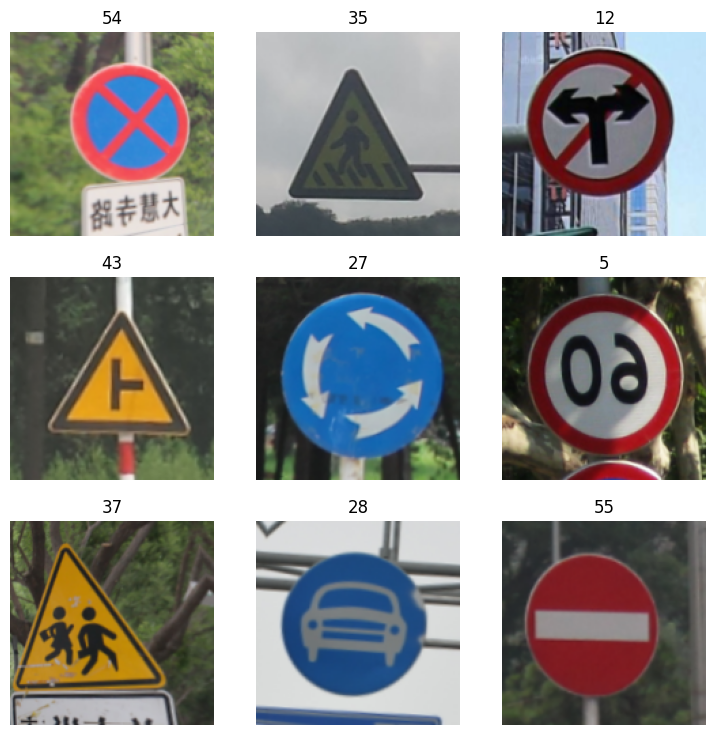

In [ ]:
dls.show_batch(max_n=9)

In [ ]:
import timm

timm.list_models('conv*')

['convformer_b36',
 'convformer_m36',
 'convformer_s18',
 'convformer_s36',
 'convit_base',
 'convit_small',
 'convit_tiny',
 'convmixer_768_32',
 'convmixer_1024_20_ks9_p14',
 'convmixer_1536_20',
 'convnext_atto',
 'convnext_atto_ols',
 'convnext_base',
 'convnext_femto',
 'convnext_femto_ols',
 'convnext_large',
 'convnext_large_mlp',
 'convnext_nano',
 'convnext_nano_ols',
 'convnext_pico',
 'convnext_pico_ols',
 'convnext_small',
 'convnext_tiny',
 'convnext_tiny_hnf',
 'convnext_xlarge',
 'convnext_xxlarge',
 'convnextv2_atto',
 'convnextv2_base',
 'convnextv2_femto',
 'convnextv2_huge',
 'convnextv2_large',
 'convnextv2_nano',
 'convnextv2_pico',
 'convnextv2_small',
 'convnextv2_tiny']

In [ ]:
learn = vision_learner(dls,'convnext_large', metrics=error_rate)



In [ ]:
learn.to_fp16()

In [ ]:
learn.fine_tune(5, cbs= SaveModelCallback(monitor='valid_loss'))

epoch,train_loss,valid_loss,error_rate,time
0,1.799237,0.339525,0.094724,00:33


Better model found at epoch 0 with valid_loss value: 0.33952513337135315.


epoch,train_loss,valid_loss,error_rate,time
0,0.338009,0.092878,0.031175,00:38
1,0.190673,0.068051,0.020384,00:39
2,0.103262,0.032122,0.009592,00:36
3,0.063568,0.015491,0.003597,00:38
4,0.035439,0.013991,0.003597,00:37


Better model found at epoch 0 with valid_loss value: 0.09287779033184052.
Better model found at epoch 1 with valid_loss value: 0.0680510625243187.
Better model found at epoch 2 with valid_loss value: 0.0321224220097065.
Better model found at epoch 3 with valid_loss value: 0.015490582212805748.
Better model found at epoch 4 with valid_loss value: 0.013991104438900948.


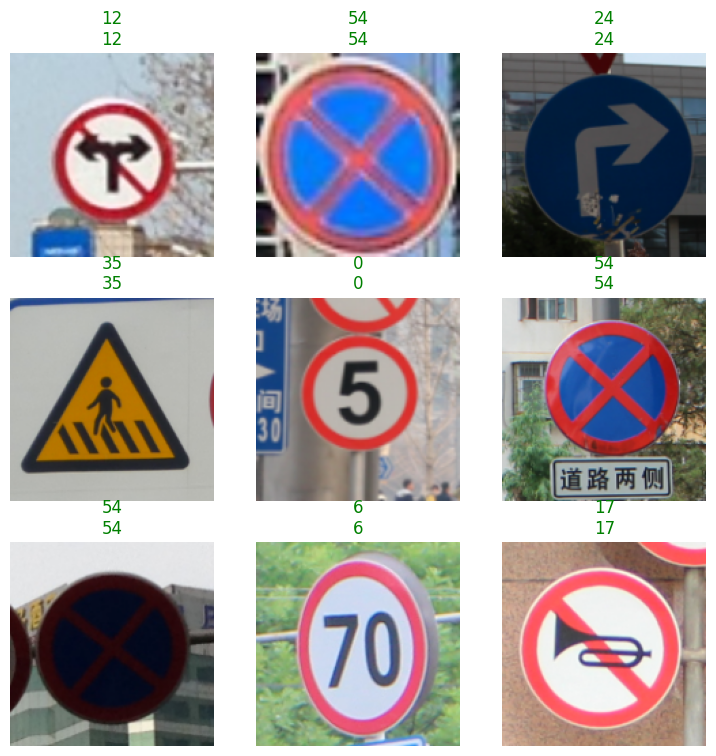

In [ ]:
learn.show_results()

In [ ]:
learn.export('model_ts.pkl')

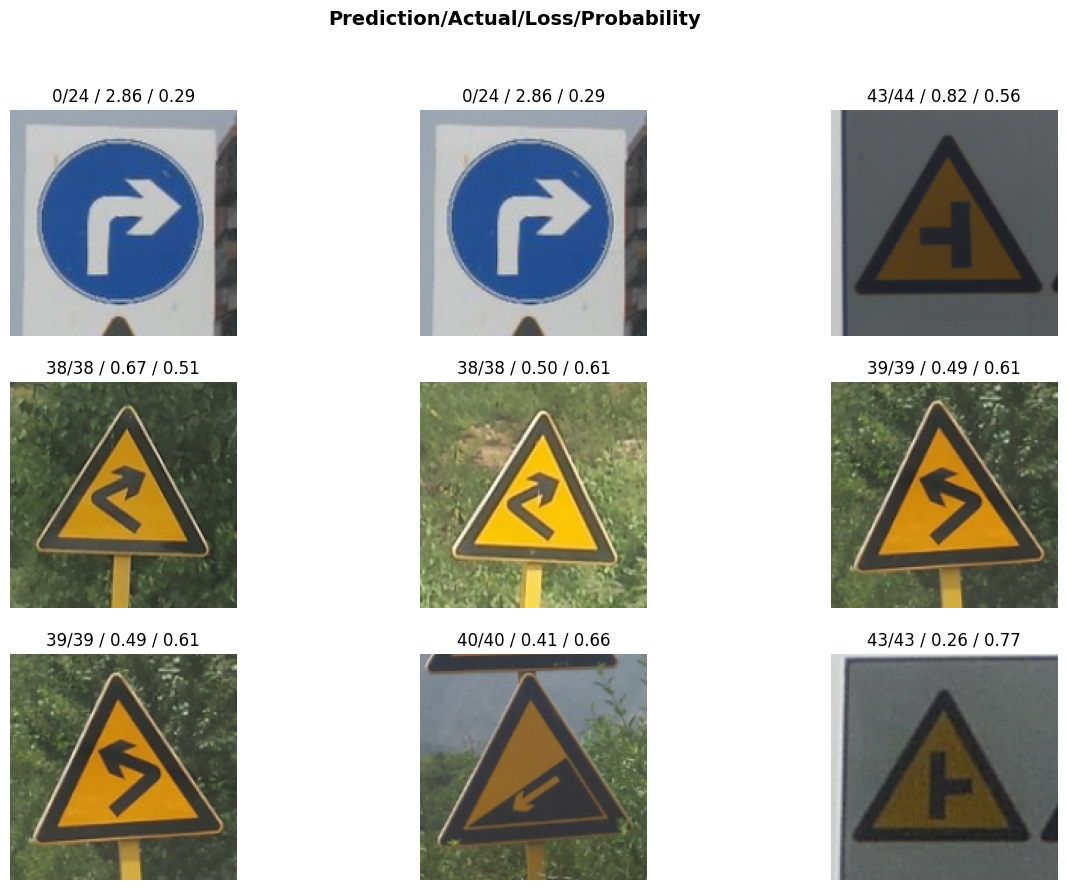

In [ ]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,10))

In [ ]:
test_folder = '/content/traffic-sign-dataset-classification/traffic_Data/TEST'


In [ ]:
test_dl = learn.dls.test_dl(get_image_files(test_folder))


In [ ]:
predictions = learn.get_preds(dl=test_dl)

In [ ]:
predicted_labels = predictions[0].argmax(dim=1)

In [ ]:
predicted_labels

tensor([ 9,  5, 50,  ..., 50, 45, 38])

In [ ]:
learn = load_learner('/content/model_ts.pkl')


In [ ]:
labels = learn.dls.vocab
def predict(img):
    img = PILImage.create(img)
    pred,pred_idx,probs = learn.predict(img)
    return {labels[i]: float(probs[i]) for i in range(len(labels))}

In [ ]:
pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 71.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 72.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.4/288.4 kB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.0/137.0 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 k

In [ ]:
import gradio as gr
gr.Interface(fn=predict, inputs=gr.inputs.Image(shape=(150, 150)), outputs=gr.outputs.Label(num_top_classes=3)).launch(share=True)


/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:259: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:262: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:200: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  super().__init__(num_top_classes=num_top_classes, type=type, label=label)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://ef82c9fd01ef393f24.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
